<h1 style="text-align: center;">Desafío - Clasificación desde el Machine Learning</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío: Individual.
Para la realización del desafío necesitarás apoyarte del archivo <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78289/activities/119118/items/610931">Apoyo Desafío - Clasificación desde el aprendizaje de máquinas</a>.

## Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
- `default`: Variable binaria. Registra si el cliente entró en morosidad o no. **(Vector objetivo)**
- `income`: Ingreso promedio declarado por el cliente.
- `balance`: Total de saldo en la cuenta de crédito.
- `student`: Variable binaria. Registra si el cliente es estudiante o no

### Desafío 1: Preparación del ambiente de trabajo
- Importe los módulos básicos para el análisis de datos
- Importe `seaborn`.
- Importe `statsmodels`.
- Importe `LogisticRegression`, `train_test_split`, `StandardScaler`, `classification_report` y `roc_curve` de `sklearn`.

In [3]:
# Utiliza esta celda para importar los módulos solicitados y el set de datos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('default_credit.csv').drop(['index'], axis=1)
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### Desafío 2: Análisis exploratorio
Explore las principales relaciones entre las variables. Utilizando los métodos `boxplot` y `lmplot` de `seaborn` implemente los siguientes gráficos. _**tip**_: Puede utilizar el parámetro `hue` en `lmplot` para identificar las observaciones por status.

- Un `boxplot` del balance total de las cuentas, segmentado por el status de estudiante.

In [4]:
# Creamos una pequeña funcion para los graficos de boxplot

def graf_boxplot(dataframe, var_cont, var_cat):
    """
        Objetivo:
            - Crear grafico de boxplot de dimensiones más grandes y con un titulo segun corresponda, segmentando segun una variable categorica
        Parámetros:
            - dataframe (Dataframe): Dataframe donde se encuentra las variables involucradas
            - var_cont (string): nombre de la variable continua
            - var2_cat (string): nombre de la variable categorica

        Retorno:
           - gráfico (Dataframe)
    """

    plt.figure(figsize=(10,5))
    sns.boxplot(x=dataframe[var_cont], y=dataframe[var_cat])
    plt.title(f'{var_cont} total de las cuentas, segmentado por el status de la variable {var_cat}', fontsize=14)

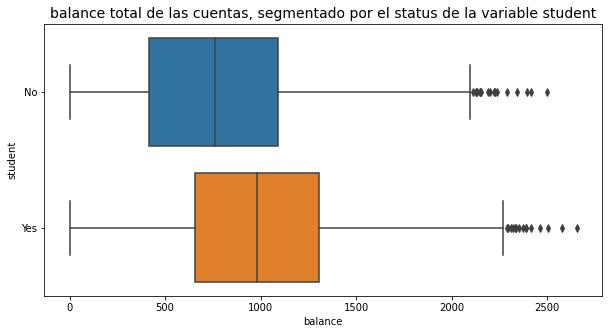

In [5]:
# Utiliza esta celda para realizar el gráfico solicitado

graf_boxplot(df, 'balance', 'student')

**Comentarios**

**<font color='green'>Se aprecia que las estadisticas basicas (media, quartiles) del Total de saldo en la cuenta de crédito para los clientes que son estudiantes es levemente superior que para los clientes que no son estudiantes, donde la media para la studiantes es cercana a los 1000, mientras que para los no estudiantes la media es cercana a los 750. Por otro lado, ambos tienen valores atipicos solo en su cola derecha.</font>**

- Un `boxplot` del ingreso total de cada cliente, segmentado por el status de estudiante.

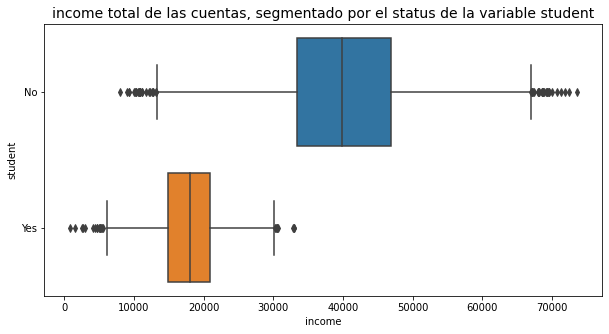

In [6]:
# Utiliza esta celda para realizar el gráfico solicitado

graf_boxplot(df, 'income', 'student')

**Comentarios**

**<font color='green'>Claramente, la distribucion del ingreso promedio declarado por el cliente es muy diferente entre clientes que son y no son estudiantes, ya que para los que si son estudiantes, tenemos valores muchisimos más bajos en comparacion con los que no son estudiantes; ademas, para los que son estudiantes, tenemos que los valores de income estan muy concentrados en la media, dejando en claro la poca variabilidad para este status; en cambio, para los que no son estudiantes, la variable income posee mucho mas variabilidad. Por ultimo, ambos tienen valores atipicos en sus dos colas.</font>**

- Un `boxplot` del balance total de las cuentas, segmentado por el status de default.

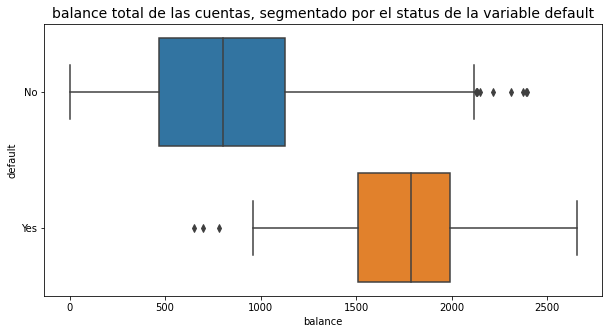

In [7]:
# Utiliza esta celda para realizar el gráfico solicitado

graf_boxplot(df, 'balance', 'default')

**Comentarios**

**<font color='green'>Claramente, la distribuion del total de saldo en la cuenta de crédito es diferentes para clientes que entraron o no en morosidad. Los clientes que entraron en morosidad, poseen en promedio, valores mucho más grandes de los que no entraron en morosidad, donde el 50% de los registros para clientes morosos se concentran entre los 1500 y 2000; mientras que para los clientes que no entraron en morosidad, el grueso se encuentra entre los 500 y los 1200. Por ultimo, en ambas categorias existes valores atipicos pero en diferentes colas: para clientes que entraron en morosidad, existen valores atipicos en su cola izquierda, mientras que con los clientes que no entraron en morosidad, existe valores atipicos pero en su cola derecha. </font>**

- Un `boxplot` del ingreso total de cada cliente, segmentado por el status de default.

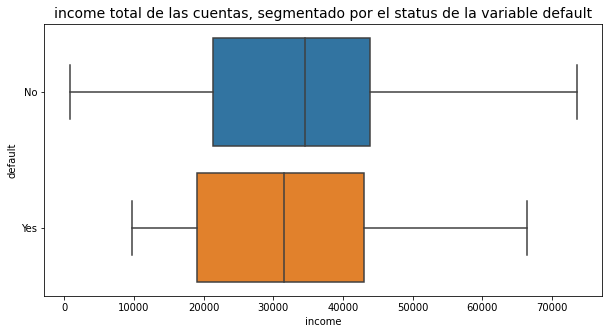

In [8]:
# Utiliza esta celda para realizar el gráfico solicitado

graf_boxplot(df, 'income', 'default')

**Comentarios**

**<font color='green'>Se aprecia que la distribcion del ingreso promedio declarado por el cliente para las categorias de default son muy similares entre si, teniendo un promedio practicamente iguales, con la unica diferencia que en terminos de variabilidad, los clientes que no entraron en morosidad tiene un poco mas de variabilidad con respecto a los que si entraron en morosidad. Por ultimo, se aprecia que en ninguna de estas categorias existen vbalores atipicos.</font>**

- Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.

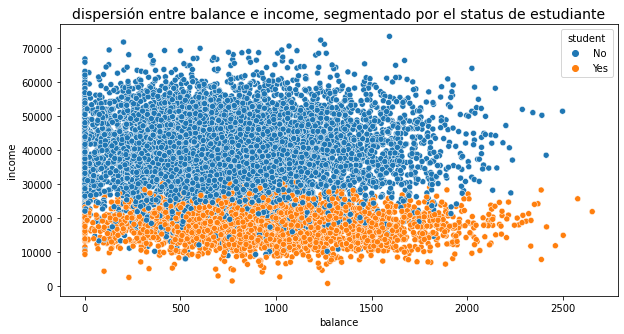

In [51]:
# Utiliza esta celda para realizar el gráfico solicitado

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="balance", y="income", hue='student')
plt.title('dispersión entre balance e income, segmentado por el status de estudiante', fontsize=14);

**Comentarios**

**<font color='green'>Claramente, se puede ver la diferencia de la asociacion entre la variable income y balance segun si el cliente es estudiante o no, ya que cuando el cliente esestudiante, estos poseen un income más bajo con respecto a los clientes que no son estudiantes.</font>**

- Un diagrama de dispersión entre balance e income, segmentado por el status de default.

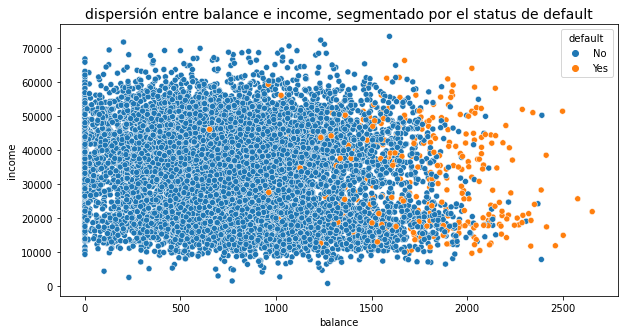

In [52]:
# Utiliza esta celda para realizar el gráfico solicitado

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="balance", y="income", hue='default')
plt.title('dispersión entre balance e income, segmentado por el status de default', fontsize=14);

**Comentarios**

**<font color='green'>Del grafico mostrado, se ve el balance es mayor para los clientes que entraron en morosidad (Default = Yes). Se ve con que muyy pocos valores pero esto es debido a que dicha clase esta muy desbalanceada.</font>**

### Desafío 3: Modelación econométrica
- Recodifique las variables `student` y `default` para que adquieran atributos numéricos.

In [9]:
# Utiliza esta celda para realizar las codificaciones solicitadas. Puedes usar LabelEncoder.

df['student'] = np.where(df['student']=='Yes',1,0)
df['default'] = np.where(df['default']=='Yes',1,0)

- Implemente el siguiente modelo econométrico:
$$
\log\left(\frac{p(\text{default}=1)}{1-p(\text{default}=1)}\right)_i = \beta_0 + \beta_{balance} \cdot \text{balance}_i + \beta_{income} \cdot \text{income}_i + \beta_{student} \cdot \text{student}_i
$$

In [109]:
# Utiliza esta celda para entrenar el modelo solicitado

modelo_full = smf.logit('default ~ balance + income + student', data = df).fit()
modelo_full.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                  0.4619
Time:                        16:41:08   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [57]:
# Utiliza esta celda para mostrar los coeficientes sifnificativos al 95% de confianza

tabla_coef = modelo_full.summary2().tables[1]
tabla_coef[tabla_coef['P>|z|'] < 0.05]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
student,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


In [110]:
# Utiliza esta celda para entrenar el modelo depurado

modelo_dep = smf.logit('default ~ balance + student', data = df).fit()
modelo_dep.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                  0.4619
Time:                        16:41:43   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [59]:
# Utiliza esta celda para mostrar los coeficientes significativos que influyen positivamente en el modelo depurado

tabla_coef_dep = modelo_dep.summary2().tables[1]
coef_significativos = tabla_coef_dep[tabla_coef_dep['P>|z|'] < 0.05]
coef_significativos[coef_significativos['Coef.'] > 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
balance,0.005738,0.000232,24.74847,3.220126e-135,0.005284,0.006193


In [60]:
# Utiliza esta celda para mostrar los coeficientes significativos que influyen negativamente en el modelo depurado

coef_significativos[coef_significativos['Coef.'] < 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-10.749496,0.369209,-29.114925,2.323735e-186,-11.473132,-10.025859
student,-0.714878,0.147522,-4.845910,1.260326e-06,-1.004015,-0.425740


**Comentarios**

**<font color='green'>Segun los valores `Pseudo R-squ` y `Log-Likelihood`, ambos modelos son muy parecidos ya que no hay mucho diferencia entre estos (para `Pseudo R-squ` los valores son exactamente los mismos, miestras que para `Log-Likelihood`, el valores difieren en 0.7, donde en este contexto, el mejor modelo es el depurado, ya que con menos variables (se descarta la variable `income` ya que estadisticamente, no aporta en la prediccion de la variable `default`), practicamente explica lo mismo que con todas las variables).</font>**

### Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo _predictivo_ con las siguientes características:

- Genera subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas

In [71]:
# Utiliza esta celda para generar los subconjuntos de train y test

df_y = df['default']
df_x = df[['balance', 'student']]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

X_train.head()

,balance,student
8371,0.000000,0
5027,491.048506,0
9234,848.605387,0
3944,1197.771881,0
6862,683.997178,0


- Estandarice las matrices de atributos de entrenamiento y pruebas usando `StandardScaler()` ajustado solo sobre el conjunto de entrenamiento.

In [72]:
# Utiliza esta celda para estandarizar la matriz de atributos de entrenamiento y aplicar dicha estandarización tanto en train como test

columns = ['balance']

scaler = StandardScaler().fit(X_train[columns])
X_train['balance'] = scaler.transform(X_train[columns])

X_train.head()

,balance,student
8371,-1.715323,0
5027,-0.704415,0
9234,0.031677,0
3944,0.750495,0
6862,-0.307198,0


- Implemente el modelo sin alterar los hiper parámetros.

In [73]:
# Utiliza esta celda para generar el modelo predictivo de LogisticRegression utilizando los datos de entrenamiento

ml_logit_dep = LogisticRegression().fit(X_train, y_train)

- Genere la predicción de las clases y de la probabilidad.

In [106]:
# Utiliza esta celda para generar y almacenar predicciones de clase y de probabilidad

columns = ['balance']

scaler = StandardScaler().fit(X_test[columns])
X_test['balance'] = scaler.transform(X_test[columns])

y_pred = ml_logit_dep.predict(X_test)
y_pred_proba = ml_logit_dep.predict_proba(X_test)[::,1]

frames = [X_test, y_test]
df_test = pd.concat(frames, axis=1)

df_test['y_pred'] = y_pred
df_test['y_pred_prob'] = y_pred_proba

df_test

,balance,student,default,y_pred,y_pred_prob
6252,1.242897,0,0,0,0.070926
4684,-0.141753,0,0,0,0.001520
1731,-1.751484,0,0,0,0.000016
4742,-1.514607,0,0,0,0.000031
4521,1.081191,0,0,0,0.046099
...,...,...,...,...,...
1744,0.391725,0,0,0,0.006832
9754,0.821491,0,0,0,0.022663
6094,-0.738259,0,0,0,0.000282
8781,2.731416,1,0,1,0.736645


- Reporte las métricas de precisión, recall y f1 para ambas clases.

In [112]:
# Utiliza esta celda para reportar las métricas solicitadas utilizando classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3177   13]
 [  77   33]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       0.72      0.30      0.42       110

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.70      3300
weighted avg       0.97      0.97      0.97      3300



- Grafique la curva Receiver Operator Characteristic.

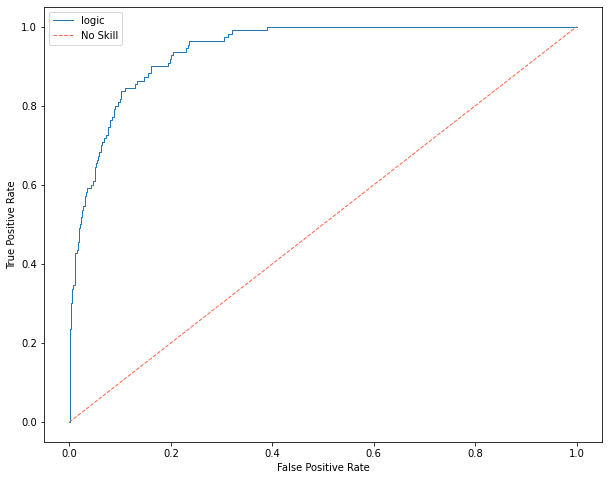

In [108]:
# Utiliza esta celda para graficar la curva ROC

fp, tp, th = roc_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot(fp, tp, lw = 1, label='logic')
plt.plot([0,1], linestyle='--', lw=1, color= 'tomato', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

- En base a los pasos, comente sobre el desempeño predictivo del modelo haciendo mención a todas las métricas calculadas y a la curva ROC.

**Comentarios**

**<font color='green'>Podemos ver que nuestro modelo implementado posee un accuracy practicamente perfecto, pero esto es muy engañoso, ya que nos encontramos ante un problema no tratado que es el desbalanceo del target, y esto nos genera el problema de que el modelo practicamente entiende que solo debe predecir una clase. Por lo general, cuando tenemos un problema de desbalanceo de clases en nuestro target, no se suele ocupar el accuracy como metrica ya que claramente este valor esta muy sesgado producto de la clase mayoritaria por lo que nos fijaremos en los otros valores. Si nos fijamos en la precision, ambos valores son bastante buenos para cada una de las clases, pero en cambio, tanto para el recall como en el f1-score, los valores para la clase de interés (default = 1) es muy bajo (0.30 y 0.42 respectivamente). Por ultimo, considerando la curva ROC, esta nos dice que nuestro modelo esta diciendo que efectivamente tenemos un buen modelo ya que la curva se aleja mucho de la linea de azar, pero esto ya lo mencionamos que tiene que ver con el problema de desbalanceo. </font>**